In [1]:
import os
import PIL.Image as piImg
import numpy as np
import matplotlib.pyplot as plt

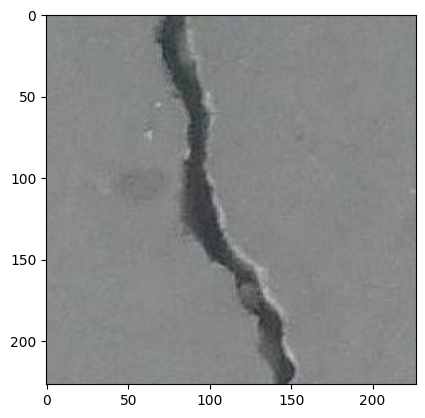

In [2]:
img = piImg.open('/content/drive/MyDrive/엠비씨_빅데이터_아카데미/deep_learning/deep_data/crack/crack/00001.jpg')
img_arr = np.array(img)
plt.imshow(img_arr)

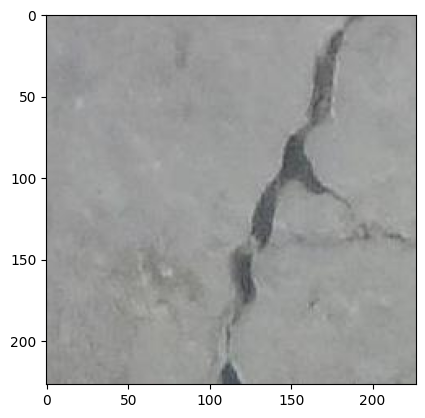

In [4]:
img = piImg.open('/content/drive/MyDrive/엠비씨_빅데이터_아카데미/deep_learning/deep_data/crack/crack/00002.jpg')
img_arr = np.array(img)
plt.imshow(img_arr)

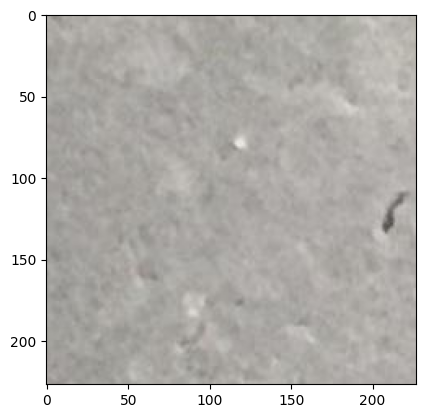

In [3]:
img = piImg.open('/content/drive/MyDrive/엠비씨_빅데이터_아카데미/deep_learning/deep_data/crack/normal/00001.jpg')
img_arr = np.array(img)
plt.imshow(img_arr)

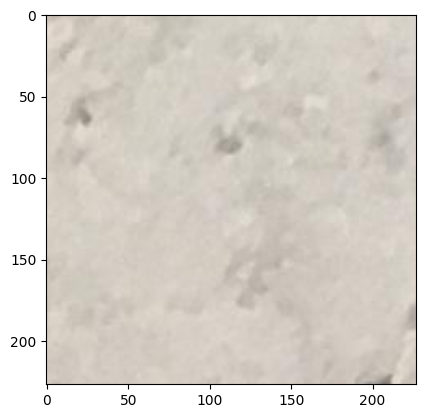

In [5]:
img = piImg.open('/content/drive/MyDrive/엠비씨_빅데이터_아카데미/deep_learning/deep_data/crack/normal/00002.jpg')
img_arr = np.array(img)
plt.imshow(img_arr)

In [9]:
import os, shutil

In [10]:
base_url = '/content/drive/MyDrive/엠비씨_빅데이터_아카데미/deep_learning/deep_data/crack'

In [11]:
train_dir = os.path.join(base_url, 'train')
test_dir = os.path.join(base_url, 'test')

In [12]:
os.mkdir(train_dir)
os.mkdir(test_dir)

In [13]:
train_crack_dir = os.path.join(train_dir, 'crack')
train_normal_dir = os.path.join(train_dir, 'normal')
test_crack_dir = os.path.join(test_dir, 'crack')
test_normal_dir = os.path.join(test_dir, 'normal')

In [14]:
os.mkdir(train_crack_dir)
os.mkdir(train_normal_dir)
os.mkdir(test_crack_dir)
os.mkdir(test_normal_dir)

In [20]:
crack_files = os.listdir(base_url + '/crack')[:2000]
normal_files = os.listdir(base_url + '/normal')[:2000]

In [21]:
print(len(crack_files), len(normal_files))

2000 2000


In [22]:
for f in crack_files[:1500]:
    shutil.copy(base_url + '/crack/' + f, train_crack_dir)
for f in crack_files[1500:]:
    shutil.copy(base_url + '/crack/' + f, test_crack_dir)

for f in normal_files[:1500]:
    shutil.copy(base_url + '/normal/' + f, train_normal_dir)
for f in normal_files[1500:]:
    shutil.copy(base_url + '/normal/' + f, test_normal_dir)

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

import numpy as ny
import matplotlib.pyplot as plt
import os

In [24]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [25]:
train_data_importer = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/엠비씨_빅데이터_아카데미/deep_learning/deep_data/chiwawa/6/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 4803 images belonging to 2 classes.


In [26]:
val_data_importer = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/엠비씨_빅데이터_아카데미/deep_learning/deep_data/chiwawa/6/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 36 images belonging to 2 classes.


In [27]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 64)        0

In [28]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
hist = model.fit(
    train_data_importer,
    epochs=10,
    validation_data=val_data_importer
)

Epoch 1/10
 75/151 [=============>................] - ETA: 5:25 - loss: 0.5511 - accuracy: 0.7100

In [ ]:
# transfer learning

In [ ]:
# prompt: resnet으로 transfer learning code를 만들어줘

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model

# Load pre-trained ResNet50 model (excluding top classification layer)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
  layer.trainable = False

# Add custom classification layers on top of ResNet50
x = base_model.output
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
x = Dense(8, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model (only the newly added layers will be trained)
hist = model.fit(
    train_data_importer,
    epochs=10,  # Adjust the number of epochs as needed
    validation_data=val_data_importer
)


In [ ]:
# prompt: resnet으로 transfer learning code를 만들어줘

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model

# Load pre-trained ResNet50 model (excluding top classification layer)
base_model = ResNet50(weights=None, include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
# for layer in base_model.layers:
#   layer.trainable = False

# Add custom classification layers on top of ResNet50
x = base_model.output
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
x = Dense(8, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model (only the newly added layers will be trained)
hist = model.fit(
    train_data_importer,
    epochs=10,  # Adjust the number of epochs as needed
    validation_data=val_data_importer
)
